In [2]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import math
from heapq import merge
from random import *
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

# predicted results

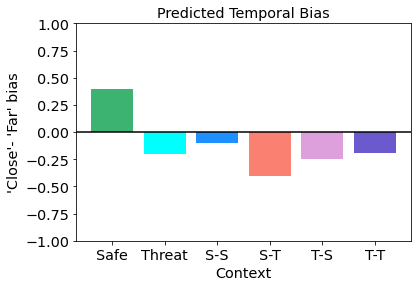

In [3]:
x = ['Safe', 'Threat','S-S', 'S-T', 'T-S', 'T-T']
y = [0.4, -0.2, -0.1, -0.4, -0.25, -0.19]
plt.bar(x, y, width=0.8, bottom=None, color = ['mediumseagreen', 'cyan','dodgerblue', 'salmon', 'plum','slateblue'], align='center', data=None)
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("Predicted Temporal Bias", fontsize = "x-large")
plt.savefig('predicted_results.pdf')

# Group data

In [2]:
res_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/allsummary2_finl.csv')

In [3]:
res_csv.head()

,Unnamed: 0,Sub,Safe_within_bias,Threat_within_bias,SS_across_bias,ST_across_bias,TS_across_bias,TT_across_bias
0,0,32.0,0.565217,0.545455,-0.2,-0.4,-0.3,-0.2
1,1,34.0,0.288889,0.022222,0.3,0.2,-0.2,-0.1
2,2,35.0,0.022222,0.200000,-0.7,-0.6,-0.3,-0.5
3,3,36.0,-0.130435,0.318182,-0.3,-0.6,-0.4,0.3
4,4,37.0,0.318182,0.347826,-0.6,-0.1,-0.7,-0.1


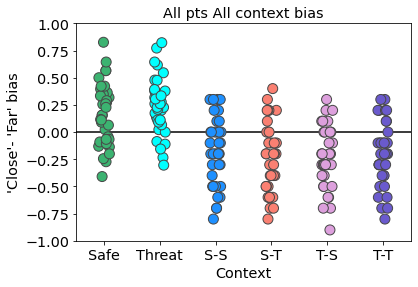

In [4]:
labels = ['Safe', 'Threat', 'S-S','S-T', 'T-S', 'T-T']
data = [res_csv.Safe_within_bias, res_csv.Threat_within_bias, res_csv.SS_across_bias, res_csv.ST_across_bias, res_csv.TS_across_bias, res_csv.TT_across_bias]
colors = ['mediumseagreen', 'cyan','dodgerblue', 'salmon', 'plum','slateblue']
sns.stripplot(data = data, s=10, linewidth=1, palette=colors)

plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(np.arange(6), labels, fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All pts All context bias", fontsize = "x-large")
#plt.show()
plt.savefig('allconds_indivbias.pdf')

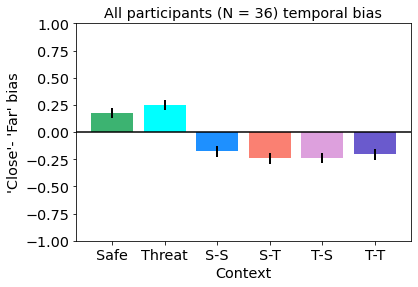

In [7]:
x = ['Safe', 'Threat','S-S', 'S-T', 'T-S', 'T-T']
y = [np.mean(res_csv.Safe_within_bias), np.mean(res_csv.Threat_within_bias), np.mean(res_csv.SS_across_bias), np.mean(res_csv.ST_across_bias), np.mean(res_csv.TS_across_bias), np.mean(res_csv.TT_across_bias)]
totalpts = len(res_csv)
sem = [stats.sem(res_csv.Safe_within_bias), stats.sem(res_csv.Threat_within_bias), stats.sem(res_csv.SS_across_bias), stats.sem(res_csv.ST_across_bias), stats.sem(res_csv.TS_across_bias), stats.sem(res_csv.TT_across_bias)]
plt.bar(x, y, width=0.8, bottom=None, color = ['mediumseagreen', 'cyan','dodgerblue', 'salmon', 'plum','slateblue'], align='center', data=None, yerr = sem, error_kw=dict(elinewidth=2,ecolor='black'))
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) temporal bias"%totalpts, fontsize = "x-large")
plt.savefig('allconds_bias.pdf')

## paired visuals

[]

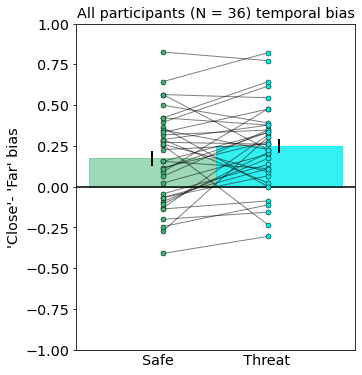

In [8]:
mediumseagreen = '#3CB371'
cyan = '#00EEEE'
fig, ax = plt.subplots(figsize=(5, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(1) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, np.mean(res_csv.Safe_within_bias), width,
    color= mediumseagreen,
    #hatch = '.',
    edgecolor= mediumseagreen,
    alpha = 0.5,
    yerr=stats.sem(res_csv.Safe_within_bias),
    label = "Safe",
    error_kw=dict(elinewidth=2,ecolor= "black"))
ax.bar(ind+width,np.mean(res_csv.Threat_within_bias)  , width,
    color= cyan,
    #hatch = '.',
    edgecolor= cyan,
    alpha = 0.8,
    yerr=stats.sem(res_csv.Threat_within_bias),
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))

#ax.legend()

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

     # Get the values for same_context and bound_context bias in each valence condition
h = res_csv.Safe_within_bias
d = res_csv.Threat_within_bias
     # Set up the x-axis values
x1 = i - 0.2
x2 = i + 0.2
line_color = ["black"]
line_colors = np.repeat(line_color, len(d))
alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
for hi, di, ci, ai in zip(h, d, line_colors, alphas):
    ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
ax.scatter(len(h)*[x1+0.03], h, c=mediumseagreen, edgecolors= "black",
s=25, lw=0.5, zorder=10)
ax.scatter(len(d)*[x2-0.08], d, c=cyan, edgecolors= "black",
s=25, lw=0.5, zorder=10)
#ax.legend(loc = 'lower left', fontsize = "large")

# Fix the axes and labels 
#legend_elements = []
plt.ylim(-1, 1)
plt.xlabel("Safe               Threat", fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) temporal bias"%totalpts, fontsize = "x-large")
#plt.legend(handles=legend_elements, loc='center')
ax.xaxis.set_tick_params(labelbottom=False)
ax.set_xticks([])


[]

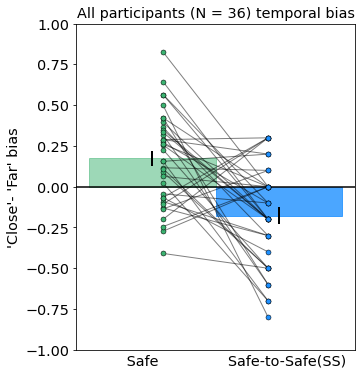

In [9]:
## Safe within and across
mediumseagreen = '#3CB371'
dodgerblue = '#1E90FF'
fig, ax = plt.subplots(figsize=(5, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(1) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, np.mean(res_csv.Safe_within_bias), width,
    color= mediumseagreen,
    #hatch = '.',
    edgecolor= mediumseagreen,
    alpha = 0.5,
    yerr=stats.sem(res_csv.Safe_within_bias),
    label = "Safe",
    error_kw=dict(elinewidth=2,ecolor= "black"))
ax.bar(ind+width,np.mean(res_csv.SS_across_bias), width,
    color= dodgerblue,
    #hatch = '.',
    edgecolor= dodgerblue,
    alpha = 0.8,
    yerr=stats.sem(res_csv.SS_across_bias),
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))

#ax.legend()

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

     # Get the values for same_context and bound_context bias in each valence condition
h = res_csv.Safe_within_bias
d = res_csv.SS_across_bias
     # Set up the x-axis values
x1 = i - 0.2
x2 = i + 0.2
line_color = ["black"]
line_colors = np.repeat(line_color, len(d))
alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
for hi, di, ci, ai in zip(h, d, line_colors, alphas):
    ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
ax.scatter(len(h)*[x1+0.03], h, c=mediumseagreen, edgecolors= "black",
s=25, lw=0.5, zorder=10)
ax.scatter(len(d)*[x2-0.08], d, c=dodgerblue, edgecolors= "black",
s=25, lw=0.5, zorder=10)
#ax.legend(loc = 'lower left', fontsize = "large")

# Fix the axes and labels 
#legend_elements = []
plt.ylim(-1, 1)
plt.xlabel("         Safe               Safe-to-Safe(SS)", fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) temporal bias"%totalpts, fontsize = "x-large")
#plt.legend(handles=legend_elements, loc='center')
ax.xaxis.set_tick_params(labelbottom=False)
ax.set_xticks([])


[]

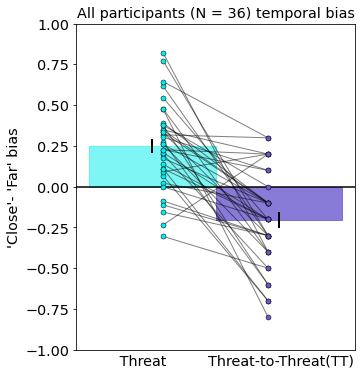

In [10]:
cyan = '#00EEEE'
slateblue = '#6A5ACD'

fig, ax = plt.subplots(figsize=(5, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(1) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, np.mean(res_csv.Threat_within_bias), width,
    color= cyan,
    #hatch = '.',
    edgecolor= cyan,
    alpha = 0.5,
    yerr=stats.sem(res_csv.Threat_within_bias),
    label = "Safe",
    error_kw=dict(elinewidth=2,ecolor= "black"))
ax.bar(ind+width,np.mean(res_csv.TT_across_bias), width,
    color= slateblue,
    #hatch = '.',
    edgecolor= slateblue,
    alpha = 0.8,
    yerr=stats.sem(res_csv.TT_across_bias),
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))

#ax.legend()

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

     # Get the values for same_context and bound_context bias in each valence condition
h = res_csv.Threat_within_bias
d = res_csv.TT_across_bias
     # Set up the x-axis values
x1 = i - 0.2
x2 = i + 0.2
line_color = ["black"]
line_colors = np.repeat(line_color, len(d))
alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
for hi, di, ci, ai in zip(h, d, line_colors, alphas):
    ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
ax.scatter(len(h)*[x1+0.03], h, c=cyan, edgecolors= "black",
s=25, lw=0.5, zorder=10)
ax.scatter(len(d)*[x2-0.08], d, c=slateblue, edgecolors= "black",
s=25, lw=0.5, zorder=10)
#ax.legend(loc = 'lower left', fontsize = "large")

# Fix the axes and labels 
#legend_elements = []
plt.ylim(-1, 1)
plt.xlabel("         Threat         Threat-to-Threat(TT)", fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) temporal bias"%totalpts, fontsize = "x-large")
#plt.legend(handles=legend_elements, loc='center')
ax.xaxis.set_tick_params(labelbottom=False)
ax.set_xticks([])


[]

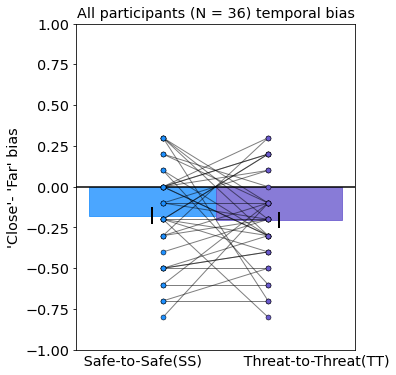

In [11]:
fig, ax = plt.subplots(figsize=(5, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(1) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind,np.mean(res_csv.SS_across_bias), width,
    color= dodgerblue,
    #hatch = '.',
    edgecolor= dodgerblue,
    alpha = 0.8,
    yerr=stats.sem(res_csv.SS_across_bias),
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))
ax.bar(ind+width,np.mean(res_csv.TT_across_bias), width,
    color= slateblue,
    #hatch = '.',
    edgecolor= slateblue,
    alpha = 0.8,
    yerr=stats.sem(res_csv.TT_across_bias),
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))

#ax.legend()

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

     # Get the values for same_context and bound_context bias in each valence condition
h = res_csv.SS_across_bias
d = res_csv.TT_across_bias
     # Set up the x-axis values
x1 = i - 0.2
x2 = i + 0.2
line_color = ["black"]
line_colors = np.repeat(line_color, len(d))
alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
for hi, di, ci, ai in zip(h, d, line_colors, alphas):
    ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
ax.scatter(len(h)*[x1+0.03], h, c=dodgerblue, edgecolors= "black",
s=25, lw=0.5, zorder=10)
ax.scatter(len(d)*[x2-0.08], d, c=slateblue, edgecolors= "black",
s=25, lw=0.5, zorder=10)
#ax.legend(loc = 'lower left', fontsize = "large")

# Fix the axes and labels 
#legend_elements = []
plt.ylim(-1, 1)
plt.xlabel("         Safe-to-Safe(SS)         Threat-to-Threat(TT)", fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) temporal bias"%totalpts, fontsize = "x-large")
#plt.legend(handles=legend_elements, loc='center')
ax.xaxis.set_tick_params(labelbottom=False)
ax.set_xticks([])


[]

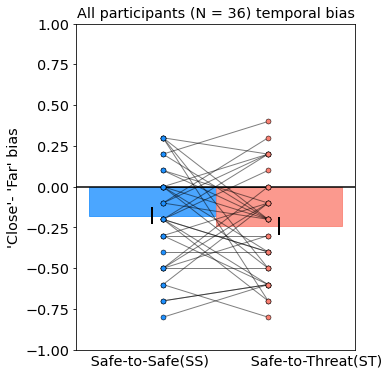

In [12]:
salmon = '#FA8072' # S-T
plum = '#DDA0DD' # T-S

fig, ax = plt.subplots(figsize=(5, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(1) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind,np.mean(res_csv.SS_across_bias), width,
    color= dodgerblue,
    #hatch = '.',
    edgecolor= dodgerblue,
    alpha = 0.8,
    yerr=stats.sem(res_csv.SS_across_bias),
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))
ax.bar(ind+width,np.mean(res_csv.ST_across_bias), width,
    color= salmon,
    #hatch = '.',
    edgecolor= salmon,
    alpha = 0.8,
    yerr=stats.sem(res_csv.ST_across_bias),
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))

#ax.legend()

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

     # Get the values for same_context and bound_context bias in each valence condition
h = res_csv.SS_across_bias
d = res_csv.ST_across_bias
     # Set up the x-axis values
x1 = i - 0.2
x2 = i + 0.2
line_color = ["black"]
line_colors = np.repeat(line_color, len(d))
alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
for hi, di, ci, ai in zip(h, d, line_colors, alphas):
    ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
ax.scatter(len(h)*[x1+0.03], h, c=dodgerblue, edgecolors= "black",
s=25, lw=0.5, zorder=10)
ax.scatter(len(d)*[x2-0.08], d, c=salmon, edgecolors= "black",
s=25, lw=0.5, zorder=10)
#ax.legend(loc = 'lower left', fontsize = "large")

# Fix the axes and labels 
#legend_elements = []
plt.ylim(-1, 1)
plt.xlabel("         Safe-to-Safe(SS)         Safe-to-Threat(ST)", fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) temporal bias"%totalpts, fontsize = "x-large")
#plt.legend(handles=legend_elements, loc='center')
ax.xaxis.set_tick_params(labelbottom=False)
ax.set_xticks([])


[]

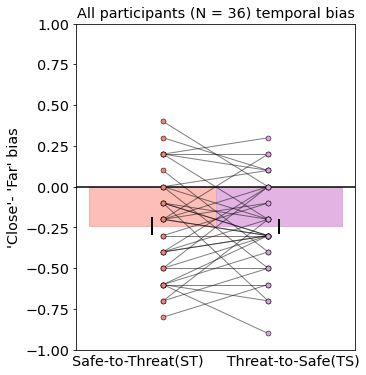

In [13]:
## valence x perceptual switch
salmon = '#FA8072' # S-T
plum = '#DDA0DD' # T-S

fig, ax = plt.subplots(figsize=(5, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(1) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, np.mean(res_csv.ST_across_bias), width,
    color= salmon,
    #hatch = '.',
    edgecolor= salmon,
    alpha = 0.5,
    yerr=stats.sem(res_csv.ST_across_bias),
    label = "Safe",
    error_kw=dict(elinewidth=2,ecolor= "black"))
ax.bar(ind+width,np.mean(res_csv.TS_across_bias), width,
    color= plum,
    #hatch = '.',
    edgecolor= plum,
    alpha = 0.8,
    yerr=stats.sem(res_csv.TS_across_bias),
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))

#ax.legend()

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

     # Get the values for same_context and bound_context bias in each valence condition
h = res_csv.ST_across_bias
d = res_csv.TS_across_bias
     # Set up the x-axis values
x1 = i - 0.2
x2 = i + 0.2
line_color = ["black"]
line_colors = np.repeat(line_color, len(d))
alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
for hi, di, ci, ai in zip(h, d, line_colors, alphas):
    ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
ax.scatter(len(h)*[x1+0.03], h, c=salmon, edgecolors= "black",
s=25, lw=0.5, zorder=10)
ax.scatter(len(d)*[x2-0.08], d, c=plum, edgecolors= "black",
s=25, lw=0.5, zorder=10)
#ax.legend(loc = 'lower left', fontsize = "large")

# Fix the axes and labels 
#legend_elements = []
plt.ylim(-1, 1)
plt.xlabel("Safe-to-Threat(ST)     Threat-to-Safe(TS)", fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) temporal bias"%totalpts, fontsize = "x-large")
#plt.legend(handles=legend_elements, loc='center')
ax.xaxis.set_tick_params(labelbottom=False)
ax.set_xticks([])


## Source controlled

In [3]:
src_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/src_controlled_bias/allSC_bias.csv')

In [6]:
src_csv

,Unnamed: 0,Participant,Safe_within_bias,Threat_within_bias,SS_across_bias,ST_across_bias,TS_across_bias,TT_across_bias
0,0,32.0,0.560976,0.578947,-0.263158,-0.230769,-0.375000,-0.375000
1,1,34.0,0.393939,0.235294,0.285714,0.166667,0.000000,0.000000
2,2,35.0,0.151515,0.393939,-0.692308,-0.647059,-0.200000,-0.818182
3,3,36.0,-0.076923,0.371429,-0.111111,-0.692308,-0.428571,0.384615
4,4,37.0,0.411765,0.454545,-0.500000,-0.230769,-0.857143,-0.111111
5,5,38.0,0.179487,0.567568,-0.333333,-0.222222,-0.157895,-0.529412
6,6,39.0,0.538462,0.241379,-0.166667,0.600000,0.400000,-0.125000
7,7,41.0,-0.076923,-0.125000,0.000000,0.333333,0.000000,-0.333333
8,8,42.0,0.904762,0.809524,0.000000,-0.444444,-0.222222,-0.333333
9,9,43.0,0.151515,0.130435,-0.230769,-0.090909,-0.600000,-0.142857


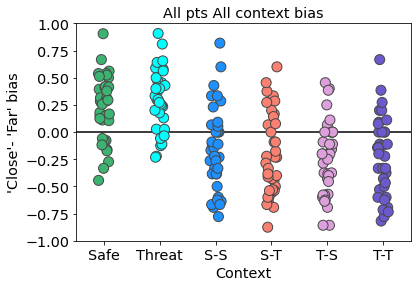

In [7]:
labels = ['Safe', 'Threat', 'S-S','S-T', 'T-S', 'T-T']
data = [src_csv.Safe_within_bias, src_csv.Threat_within_bias, src_csv.SS_across_bias, src_csv.ST_across_bias, src_csv.TS_across_bias, src_csv.TT_across_bias]
colors = ['mediumseagreen', 'cyan','dodgerblue', 'salmon', 'plum','slateblue']
sns.stripplot(data = data, s=10, linewidth=1, palette=colors)

plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(np.arange(6), labels, fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All pts All context bias", fontsize = "x-large")
#plt.show()
plt.savefig('source_controlled_bias_indiv.pdf')

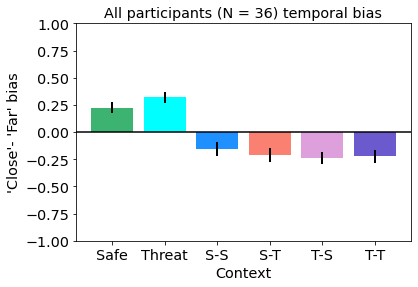

In [8]:
x = ['Safe', 'Threat','S-S', 'S-T', 'T-S', 'T-T']
y = [np.mean(src_csv.Safe_within_bias), np.mean(src_csv.Threat_within_bias), np.mean(src_csv.SS_across_bias), np.mean(src_csv.ST_across_bias), np.mean(src_csv.TS_across_bias), np.mean(src_csv.TT_across_bias)]
totalpts = len(src_csv)
sem = [stats.sem(src_csv.Safe_within_bias), stats.sem(src_csv.Threat_within_bias), stats.sem(src_csv.SS_across_bias), stats.sem(src_csv.ST_across_bias), stats.sem(src_csv.TS_across_bias), stats.sem(src_csv.TT_across_bias)]
plt.bar(x, y, width=0.8, bottom=None, color = ['mediumseagreen', 'cyan','dodgerblue', 'salmon', 'plum','slateblue'], align='center', data=None, yerr = sem, error_kw=dict(elinewidth=2,ecolor='black'))
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) temporal bias"%totalpts, fontsize = "x-large")
plt.savefig('source_controlled_bias.pdf')

## binary lit graph

In [4]:
#b_df = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/binary_bias.csv')
b_df2runs = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/first2runs/2runs_binary_bias.csv')
binry = pd.melt(b_df2runs, id_vars=['id'], value_vars=['Safe_within_bias', 'Threat_within_bias','SS_across_bias','ST_across_bias','TS_across_bias','TT_across_bias'], var_name='condition', value_name='resp_bias')

In [5]:
binry.loc[binry['condition'] == 'Safe_within_bias', 'valence'] = 'Safe'
binry.loc[binry['condition'] == 'SS_across_bias', 'valence'] = 'Safe'
binry.loc[binry['condition'] == 'Threat_within_bias', 'valence'] = 'Threat'
binry.loc[binry['condition'] == 'TT_across_bias', 'valence'] = 'Threat'

binry.loc[binry['condition'] == 'Safe_within_bias', 'test'] = '1within'
binry.loc[binry['condition'] == 'SS_across_bias', 'test'] = '2across'
binry.loc[binry['condition'] == 'Threat_within_bias', 'test'] = '1within'
binry.loc[binry['condition'] == 'TT_across_bias', 'test'] = '2across'

In [6]:
#binry.to_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/binary_r.csv')
binry.to_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/first2runs/binary_r.csv')

C:\Users\ayesh\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-8-6e3a4d31962e>:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_yticklabels(ylbls, fontsize='18')


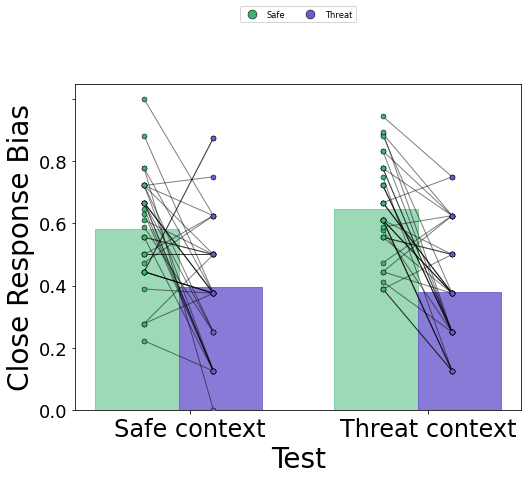

In [8]:
mediumseagreen = '#3CB371' # Safe within
dodgerblue = '#1E90FF' # Safe across

cyan = '#00EEEE' # Threat within
slateblue = '#6A5ACD' # Threat across

fig, ax = plt.subplots(figsize=(8, 6))

#withins = [np.mean(b_df.Safe_within_bias), np.mean(b_df.Threat_within_bias)]
#acrosss = [np.mean(b_df.SS_across_bias), np.mean(b_df.TT_across_bias)]

#within_sem = [stats.sem(b_df.Safe_within_bias), stats.sem(b_df.Safe_within_bias)]
#across_sem = [stats.sem(b_df.SS_across_bias), stats.sem(b_df.TT_across_bias)]

withins = [np.mean(b_df2runs.Safe_within_bias), np.mean(b_df2runs.Threat_within_bias)]
acrosss = [np.mean(b_df2runs.SS_across_bias), np.mean(b_df2runs.TT_across_bias)]

within_sem = [stats.sem(b_df2runs.Safe_within_bias), stats.sem(b_df2runs.Safe_within_bias)]
across_sem = [stats.sem(b_df2runs.SS_across_bias), stats.sem(b_df2runs.TT_across_bias)]

#totalpts = len(b_df)
totalpts = len(b_df2runs)


##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, withins, width,
    color= mediumseagreen,
    #hatch = '.',
    edgecolor= mediumseagreen,
    alpha = 0.5,
    yerr=within_sem,
    label = "Within",
    error_kw=dict(elinewidth=2,ecolor= "black"))
ax.bar(ind+width,acrosss, width,
    color= slateblue,
    #hatch = '.',
    edgecolor= slateblue,
    alpha = 0.8,
    yerr=across_sem,
    label = "Across",
    error_kw=dict(elinewidth=2,ecolor= "black"))

# Fix the axes and labels 
##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

for one_exp, subdf in binry.groupby('valence'):
    exps2.append(one_exp)
     # Get the values for same_context and bound_context bias in each valence condition
    h = subdf.query('test == "1within"')['resp_bias'].values
    d = subdf.query('test == "2across"')['resp_bias'].values
     # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
    line_color = ["black"]
    line_colors = np.repeat(line_color, len(d))
    alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1+0.03], h, c=mediumseagreen, edgecolors= "black",
    s=25, lw=0.5, label='Safe', zorder=10)
    ax.scatter(len(d)*[x2-0.08], d, c=slateblue, edgecolors= "black",
    s=25, lw=0.5, label='Threat', zorder=10)
 # Update x-axis
    i += 1

# Fix the axes and labels
ylbls = [0.0, 0.2, 0.4, 0.6, 0.8]
lbls = ['Safe context', 'Threat context'] #adjust for exp1, insert 'Non-overlapping pairs (XY)'
ax.set_xticks([0.22, 1.22])
_ = ax.set_xticklabels(lbls, fontsize='24')
_ = ax.set_yticklabels(ylbls, fontsize='18')

# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='small',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Test', fontsize = 28)
ax.set_ylabel('Close Response Bias', fontsize =28)

ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')
plt.savefig('lit_bias.pdf')

C:\Users\ayesh\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-9-b5f21489ea11>:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_yticklabels(ylbls, fontsize='18')


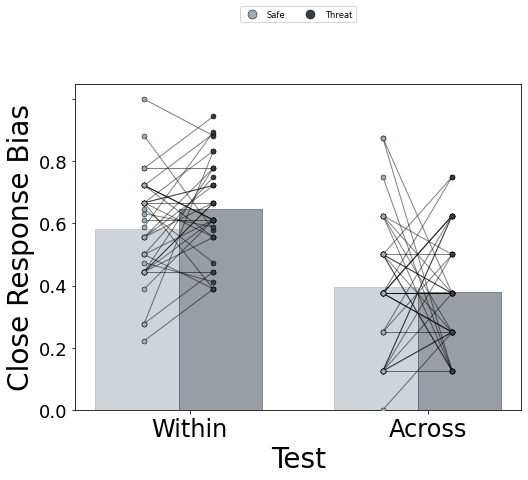

In [9]:
mediumseagreen = '#3CB371' # Safe within
dodgerblue = '#1E90FF' # Safe across

cyan = '#00EEEE' # Threat within
slateblue = '#6A5ACD' # Threat across

light = '#9cadb7'
dark = '#333f48'

fig, ax = plt.subplots(figsize=(8, 6))

#safes = [np.mean(b_df.Safe_within_bias), np.mean(b_df.SS_across_bias)]
#threats = [np.mean(b_df.Threat_within_bias), np.mean(b_df.TT_across_bias)]

#safe_sem = [stats.sem(b_df.Safe_within_bias), stats.sem(b_df.SS_across_bias)]
#threat_sem = [stats.sem(b_df.Threat_within_bias), stats.sem(b_df.TT_across_bias)]

safes = [np.mean(b_df2runs.Safe_within_bias), np.mean(b_df2runs.SS_across_bias)]
threats = [np.mean(b_df2runs.Threat_within_bias), np.mean(b_df2runs.TT_across_bias)]

safe_sem = [stats.sem(b_df2runs.Safe_within_bias), stats.sem(b_df2runs.SS_across_bias)]
threat_sem = [stats.sem(b_df2runs.Threat_within_bias), stats.sem(b_df2runs.TT_across_bias)]

#totalpts = len(b_df)
totalpts = len(b_df2runs)


##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, safes, width,
    color= light,
    #hatch = '.',
    edgecolor= light,
    alpha = 0.5,
    yerr=safe_sem,
    label = "Safe",
    error_kw=dict(elinewidth=2,ecolor= light))
ax.bar(ind+width,threats, width,
    color= dark,
    #hatch = '.',
    edgecolor= dark,
    alpha = 0.5,
    yerr=threat_sem,
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= dark))

# Fix the axes and labels 
##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

for one_exp, subdf in binry.groupby('test'):
    exps2.append(one_exp)
     # Get the values for same_context and bound_context bias in each valence condition
    h = subdf.query('valence == "Safe"')['resp_bias'].values
    d = subdf.query('valence == "Threat"')['resp_bias'].values
     # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
    line_color = ["black"]
    line_colors = np.repeat(line_color, len(d))
    alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1+0.03], h, c=light, edgecolors= "black",
    s=25, lw=0.5, label='Safe', zorder=10)
    ax.scatter(len(d)*[x2-0.08], d, c=dark, edgecolors= "black",
    s=25, lw=0.5, label='Threat', zorder=10)
 # Update x-axis
    i += 1

# Fix the axes and labels
ylbls = [0.0, 0.2, 0.4, 0.6, 0.8]
lbls = ['Within', 'Across'] #adjust for exp1, insert 'Non-overlapping pairs (XY)'
ax.set_xticks([0.22, 1.22])
_ = ax.set_xticklabels(lbls, fontsize='24')
_ = ax.set_yticklabels(ylbls, fontsize='18')

# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='small',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Test', fontsize = 28)
ax.set_ylabel('Close Response Bias', fontsize =28)

ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')
#plt.savefig('WAlit_bias_updated.pdf')